In [ ]:
import sys
sys.path.append("../")
from core.MLp_layer import *
from CNN.Loop_based_cnn.Cnn_layers import *
from CNN.Loop_based_cnn.Cnn_operations import *
from utils.activations import *
from core.model_structure import Deep_learning_Model


In [2]:
def generate_mini_mnist(num_samples=100, img_size=5, num_classes=5):
    X = torch.zeros(num_samples, 1, img_size, img_size)
    y = torch.randint(0, num_classes, (num_samples, 1))

    for i in range(num_samples):
        label = y[i].item()
        if label == 0:
            X[i, 0, 1:4, 2] = 1  # barre verticale
        elif label == 1:
            X[i, 0, 2, 1:4] = 1  # barre horizontale
        elif label == 2:
            X[i, 0, 1:4, 1:4] = 1  # carré plein
        elif label == 3:
            X[i, 0, 0:5, 0:5] = torch.eye(5)  # diagonale
        elif label == 4:
            X[i, 0, 2, 2] = 1  # point central

    return X, y

# Exemple d'utilisation :
X_train, y_train = generate_mini_mnist(50, 5, 5)
X_test, y_test = generate_mini_mnist(10, 5, 5)

print(y_train.unique())
print(y_test.unique())



tensor([0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4])


In [3]:
formes = []
formes.extend([X_train[10], X_train[3], X_train[0], X_train[2], X_train[1]])



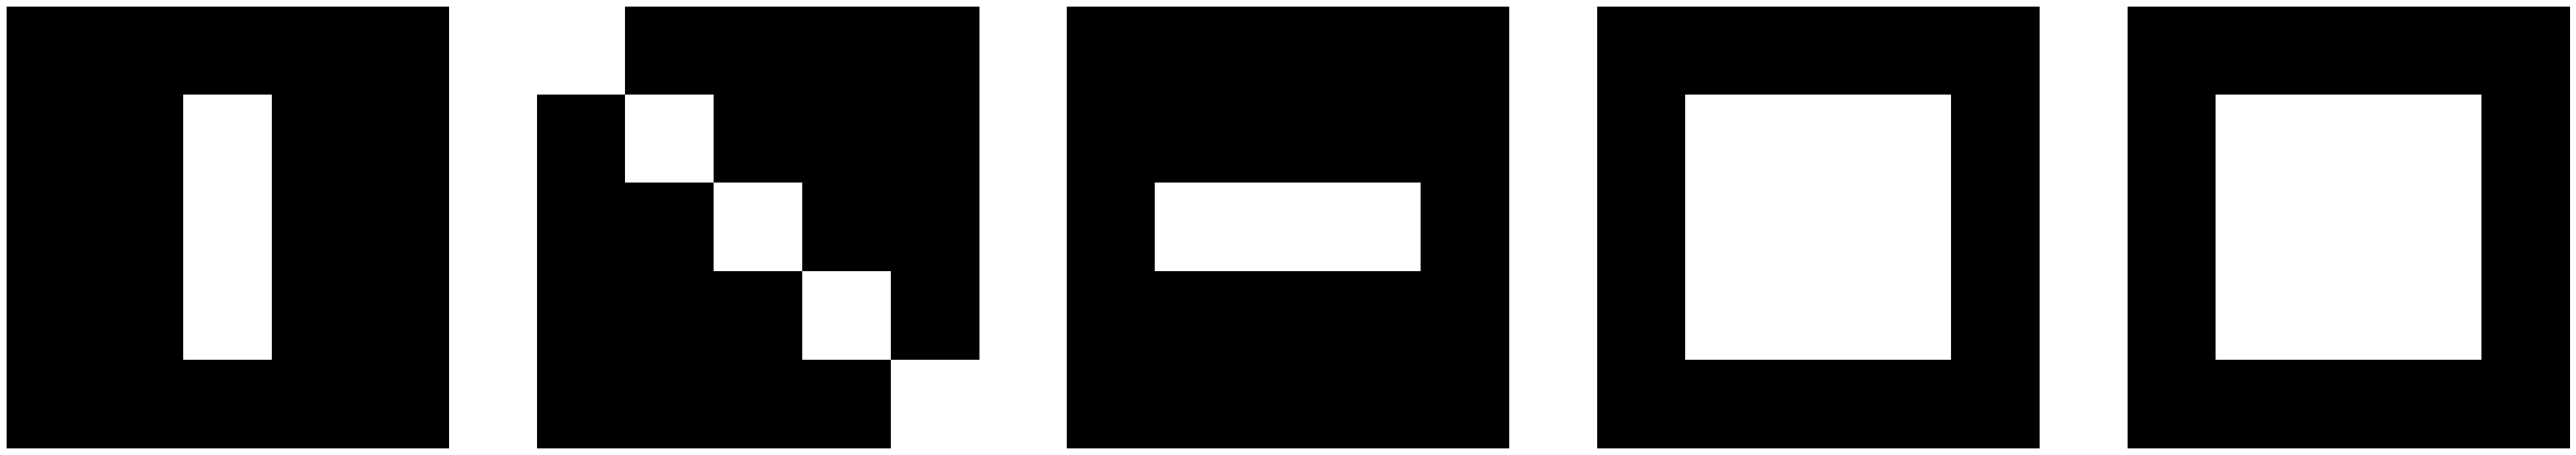

In [4]:
import torch
import matplotlib.pyplot as plt

fig,axes=plt.subplots(1,5,figsize=(50,10))
for i,f in enumerate(formes):
 img = f.squeeze(0).numpy() # (5, 5)
 axes[i].imshow(img, cmap='gray')
 axes[i].axis('off')


In [5]:
y_test=torch.eye(5)[y_test.long()].squeeze(1)
y_train=torch.eye(5)[y_train.long()].squeeze(1)


In [7]:
Shapes_model=Deep_learning_Model(
        "adam","Crossentropy"
)

Shapes_model.add_layers([
    Conv_layer(1, 16, (3, 3), padding=1, stride=1, initializer="HeNormal"),
    Batch_norm_layer(16),
    LeakyRelu(0.01),

    Conv_layer(16, 32, (3, 3), padding=1, stride=1, initializer="HeNormal"),
    Batch_norm_layer(32),
    LeakyRelu(0.01),

    max_pool_layer((2, 2), stride=2),  # Réduction spatiale ici

    Flatten_layer(),

    Layer(32 * 2 * 2, 64, initializer="HeNormal"),
    LeakyRelu(0.01),

    Layer(64, 5, initializer="HeNormal"),
])
train_losses,val_losses,accs,val_accs=Shapes_model.minibatch_SGD_train(10,X_train,y_train,X_test,y_test,batch_size=10,learning_rate=0.001,accuracy=True)


1 | Train Loss: 0.4424 | Val Loss: 0.3447 | Train Acc: 18.00% | Val Acc: 10.00%
2 | Train Loss: 0.3335 | Val Loss: 0.2810 | Train Acc: 18.00% | Val Acc: 50.00%
3 | Train Loss: 0.2625 | Val Loss: 0.2460 | Train Acc: 32.00% | Val Acc: 80.00%
4 | Train Loss: 0.2134 | Val Loss: 0.2241 | Train Acc: 74.00% | Val Acc: 80.00%
5 | Train Loss: 0.1827 | Val Loss: 0.2038 | Train Acc: 78.00% | Val Acc: 80.00%
6 | Train Loss: 0.1620 | Val Loss: 0.1835 | Train Acc: 76.00% | Val Acc: 80.00%
7 | Train Loss: 0.1472 | Val Loss: 0.1634 | Train Acc: 82.00% | Val Acc: 80.00%
8 | Train Loss: 0.1271 | Val Loss: 0.1446 | Train Acc: 84.00% | Val Acc: 80.00%
9 | Train Loss: 0.1098 | Val Loss: 0.1281 | Train Acc: 84.00% | Val Acc: 80.00%
10 | Train Loss: 0.0998 | Val Loss: 0.1137 | Train Acc: 84.00% | Val Acc: 80.00%


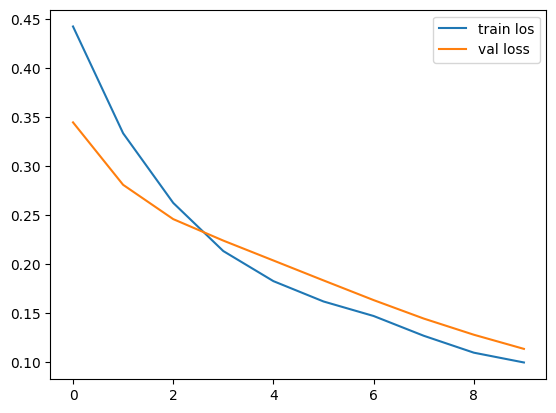

In [8]:
import matplotlib.pyplot as plt
plt.plot(range(10),train_losses,label="train los")
plt.plot(range(10),val_losses,label="val loss")
plt.legend()

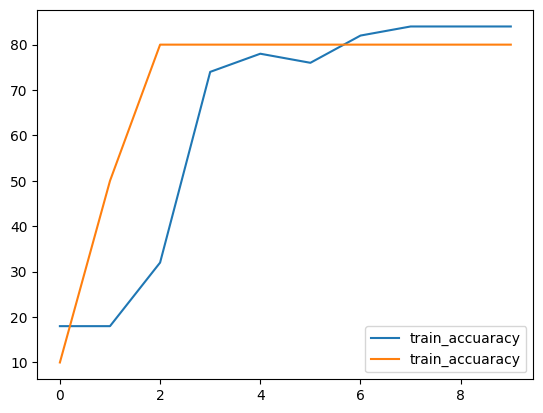

In [9]:
plt.plot(range(10),accs,label="train_accuaracy")
plt.plot(range(10),val_accs,label="train_accuaracy")
plt.legend()